EXPONENTIALLY WEIGHTED MOVING AVERAGE

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate synthetic data
X = np.random.randn(1000, 10)  # 1000 samples, 10 features each
y = np.random.randn(1000, 1)   # 1000 target values

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Define a simple neural network model
model = Sequential([
    Dense(50, activation='relu', input_shape=(10,)),  # Hidden layer with 50 units
    Dense(1,activation='sigmoid')  # Output layer with 1 unit
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')


In [8]:
def ewma(data, alpha=0.1):
    """Compute the Exponential Weighted Moving Average."""
    ewma_data = np.zeros_like(data)
    ewma_data[0] = data[0]
    for t in range(1, len(data)):
        ewma_data[t] = alpha * data[t] + (1 - alpha) * ewma_data[t-1]
    return ewma_data


In [9]:
# Training the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Compute EWMA of the training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Alpha (smoothing factor) can be adjusted
alpha = 0.1
ewma_train_loss = ewma(train_loss, alpha=alpha)
ewma_val_loss = ewma(val_loss, alpha=alpha)


Test Loss: 0.9455


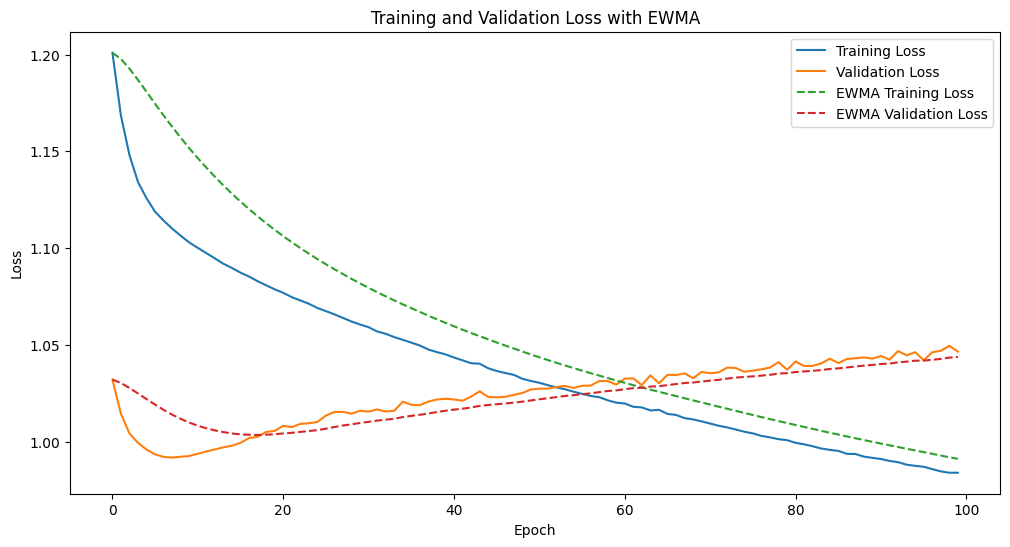

In [10]:
# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss:.4f}')

# Plot the training and validation loss along with their EWMA
plt.figure(figsize=(12, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.plot(ewma_train_loss, label='EWMA Training Loss', linestyle='--')
plt.plot(ewma_val_loss, label='EWMA Validation Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss with EWMA')
plt.legend()
plt.show()
